# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [79]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [80]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [81]:
# Write your code here
num_rows=df.shape[0]
num_cols=df.shape[1]
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_cols}")

Number of rows:1898
Number of columns:9


#### Observations: 
There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [82]:
# Use info() to print a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations: 
The column 0, 1, 7, 8 are int64; column 2, 3, 5, 6 are object; and column 4 is float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [83]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
There are no missing values for each column


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [84]:
# Write your code here
min_value=df['food_preparation_time'].min()
average_value=df['food_preparation_time'].mean()
max_value=df['food_preparation_time'].max()
print(f'Minimum time: {min_value}')
print(f'Average time: {int(average_value)}')
print(f'Maximum time: {max_value}')

Minimum time: 20
Average time: 27
Maximum time: 35


#### Observations: 
The minimum time for prepareing food is 20, the average time is 27, and the maximum time is 35 (I assume the unit is mintues for this column)


### **Question 5:** How many orders are not rated? [1 mark]

In [85]:
# Write the code here
not_rated=df['rating'].value_counts()['Not given']
print(not_rated)

736


#### Observations: 
There are 736 orders without rating


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Text(0.5, 1.0, 'Restaurant Rank')

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


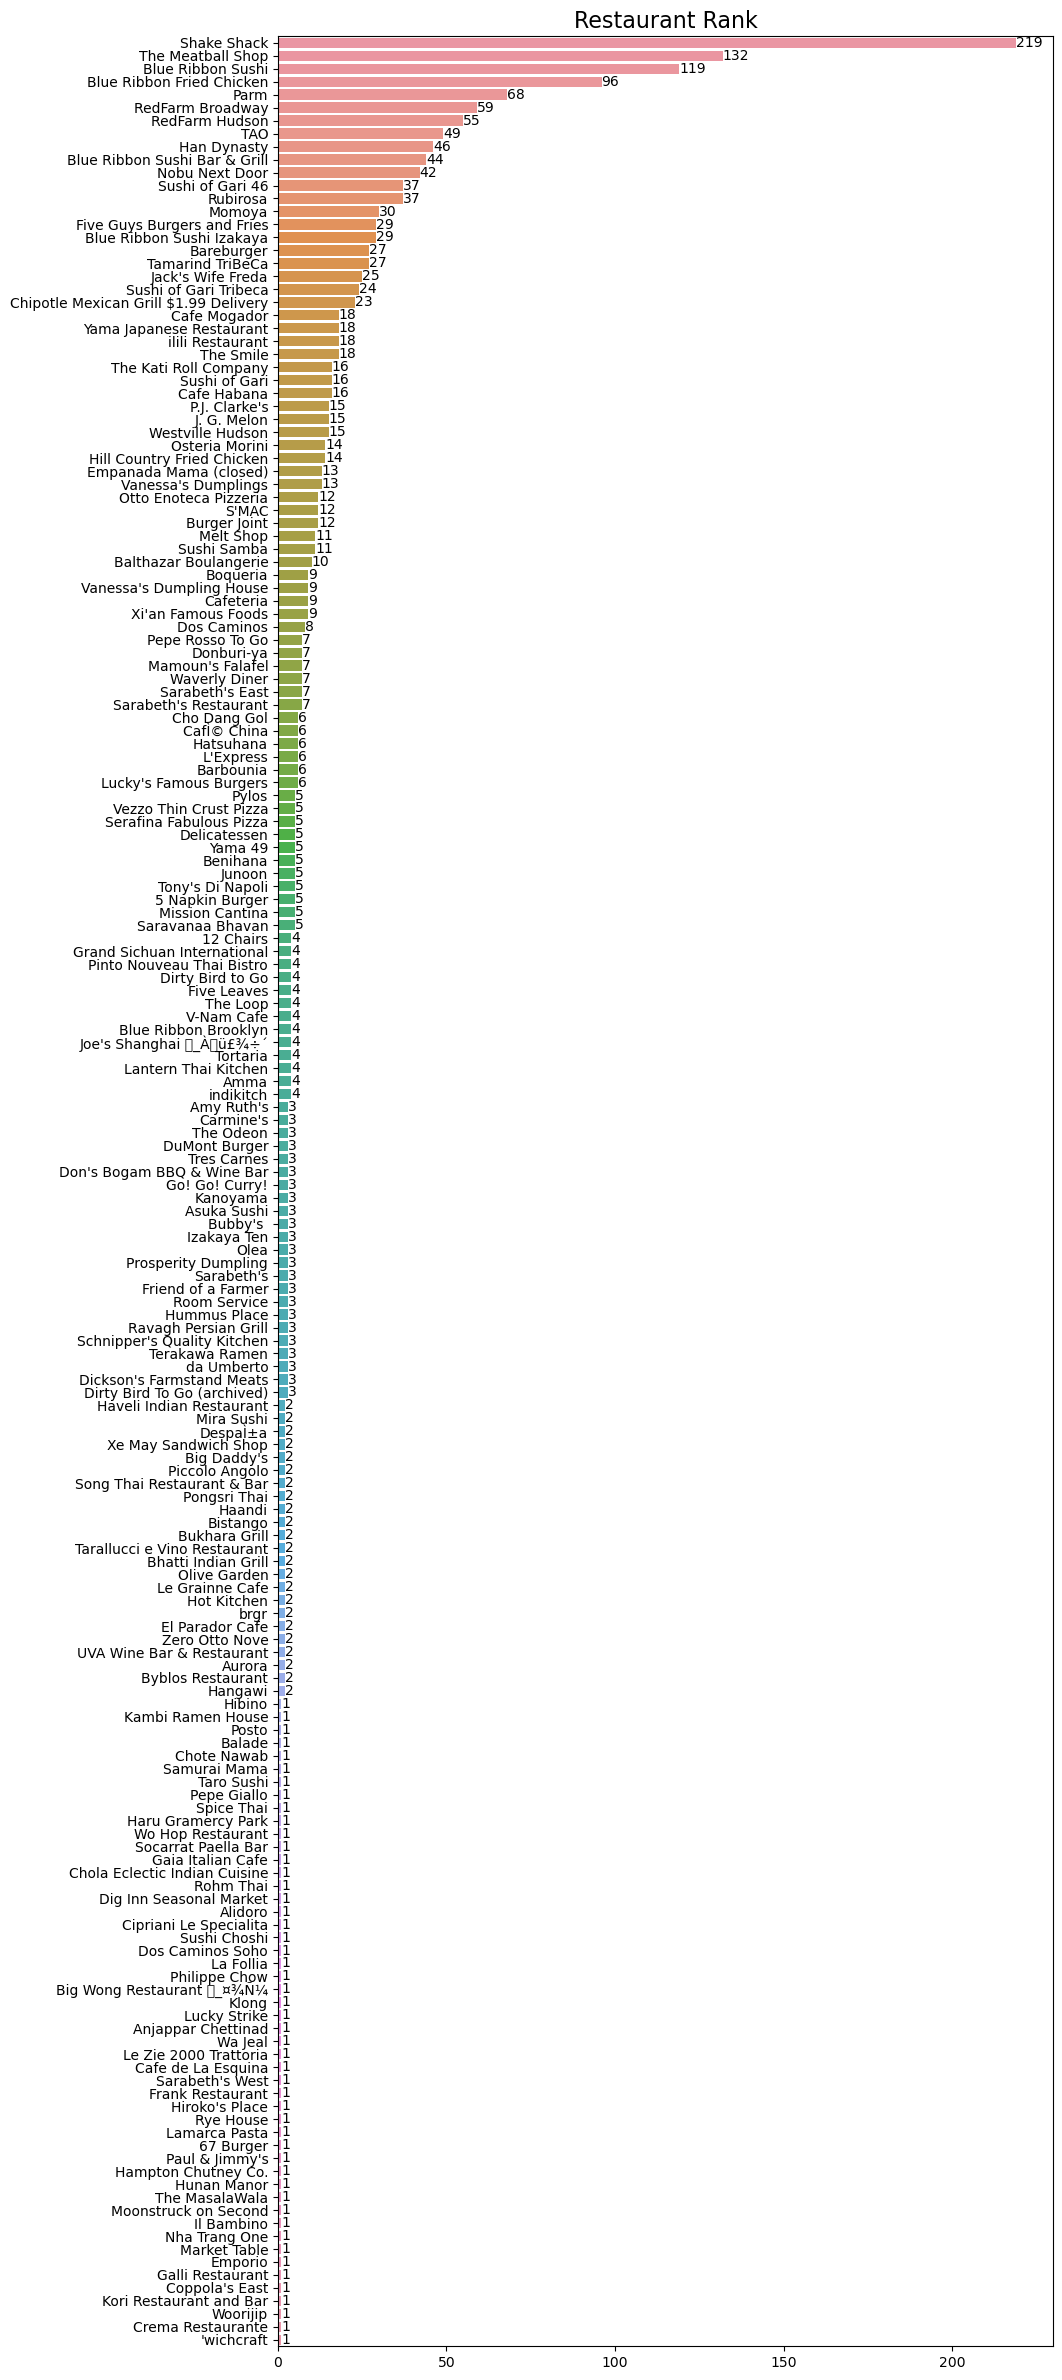

In [86]:
# Write the code here

#Visualization of the number of food types and resaurant names
#Sort the counts in descending order to get the most popular cuisines first
restaurant_count = df['restaurant_name'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 30))
bars = sns.barplot(data=df, y=restaurant_count.index, x=restaurant_count.values)

# Function to display values above each bar
for index, value in enumerate(restaurant_count.values):
    bars.text(value, index, str(value), ha='left', va='center', fontsize=10)


plt.title('Restaurant Rank', fontsize=16)


(-1.0999983656275536,
 1.0999988925056652,
 -1.0999726817122886,
 1.0999986988985242)

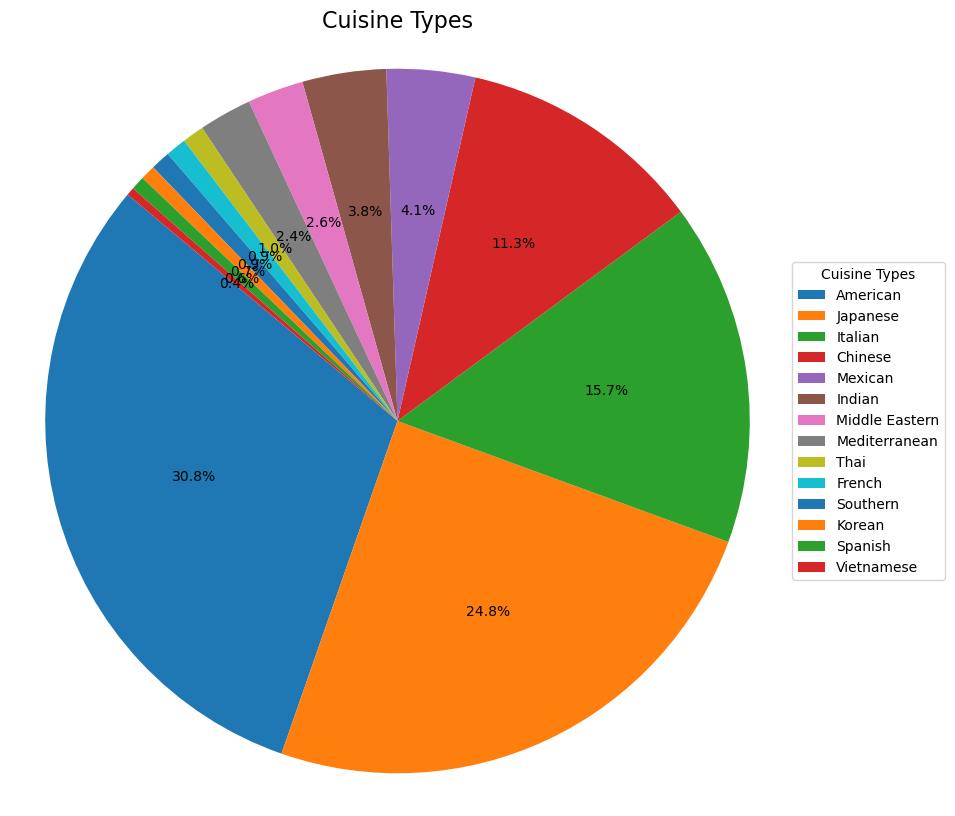

In [87]:
# Sort the counts of cuisine types in descending order
cuisines_count = df['cuisine_type'].value_counts().sort_values(ascending=False)

# Plot the cuisines types distribution
plt.figure(figsize=(10, 10))


# Create the pie chart with custom label font size
plt.pie(cuisines_count, labels=None, autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 10})

plt.title('Cuisine Types', fontsize=16)

# Add a legend to the pie chart
plt.legend(cuisines_count.index, title='Cuisine Types', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.axis('equal')


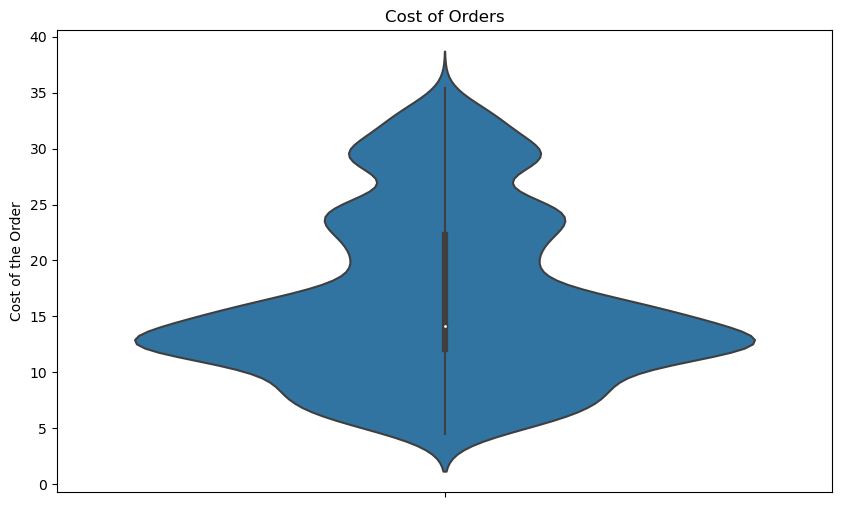

In [88]:
# Plot the cost of the order
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='cost_of_the_order')
plt.ylabel('Cost of the Order')
plt.title('Cost of Orders')
plt.show()


([<matplotlib.patches.Wedge at 0x2a652a73850>,
 [Text(-0.679107125435181, 0.8653401135872331, 'Weekend'),
  Text(0.6791071254351813, -0.865340113587233, 'Weekday')],
 [Text(-0.3704220684191896, 0.47200369832030886, '71.2%'),
  Text(0.37042206841918973, -0.4720036983203088, '28.8%')])

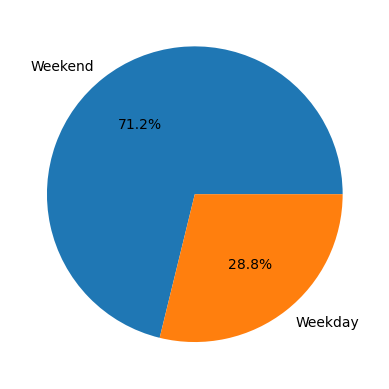

In [89]:
# Plot the day of a week
weekday_count = df['day_of_the_week'].value_counts()
plt.pie(weekday_count, labels=weekday_count.index, autopct='%1.1f%%', textprops={'fontsize': 10})


Text(0.5, 1.0, 'Distribution of Ratings')

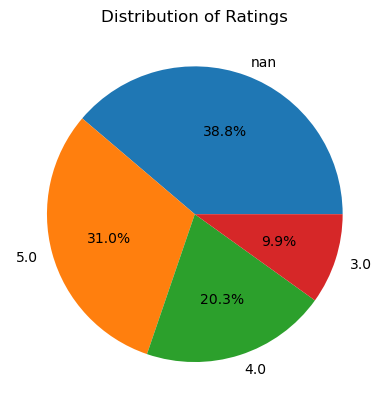

In [90]:
# Plot the Rating
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

rating_count = df['rating'].value_counts(dropna=False)

plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', textprops={'fontsize': 10})

plt.title('Distribution of Ratings')

Text(0, 0.5, 'Preparation Time')

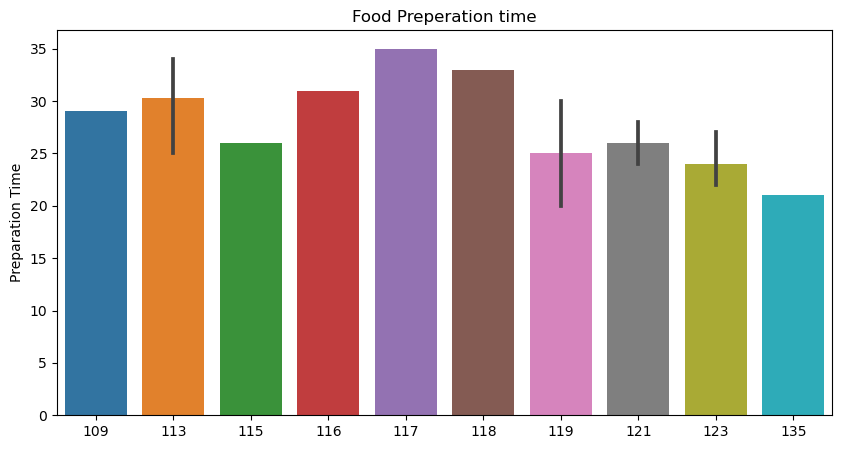

In [91]:
# Plot food preperation time
preperation_count=df['food_preparation_time'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=preperation_count.index, x=preperation_count.values)

plt.title('Food Preperation time')
plt.ylabel('Preparation Time')

Text(0, 0.5, 'Delivery Time')

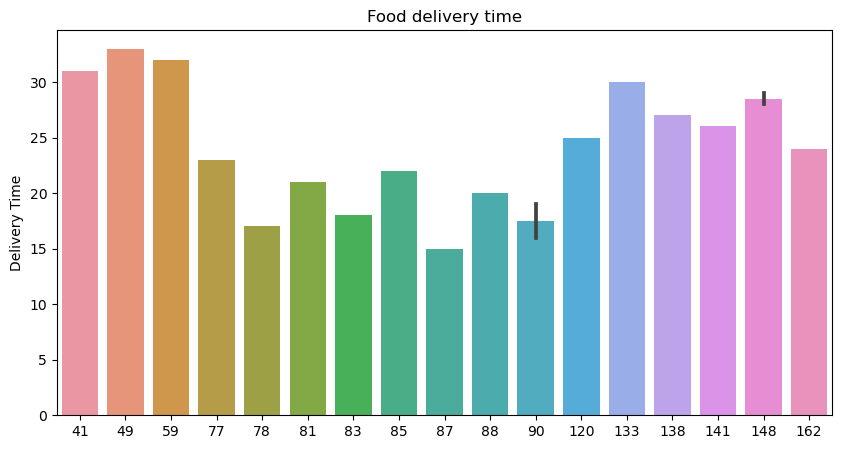

In [92]:
# Plot delivery time
delivery_count=df['delivery_time'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=delivery_count.index, x=delivery_count.values)

plt.title('Food delivery time')
plt.ylabel('Delivery Time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [93]:
# Write the code here
restaurant_count = df['restaurant_name'].value_counts().head()
print(restaurant_count)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The 5 most popular restaurants (based on ordered numbers) are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [94]:
# Write the code here
# Filter the data for weekends
weekends = df['day_of_the_week'].isin(['Weekend'])
# Calculate the number of orders for each cuisine type on weekends, and get the most top cuisine types
cuisine_weekends= df[weekends]['cuisine_type'].value_counts().idxmax

print(cuisine_weekends)

<bound method Series.idxmax of American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64>


#### Observations:
During the weekend, Japanese food is the most popular cuisine type

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [95]:
# Write the code here

# Calculate the number of orders that cost more than 20 dollars
order_above_20=len(df[df['cost_of_the_order']>20])

# Calculate the percentage of orders that cost more than 20 dollars
percentage=(order_above_20/len(df))*100

print(percentage,'%')

29.24130663856691 %


#### Observations:
About 29% (float ignored) of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [96]:
# Write the code here
delivery_time_mean=df['delivery_time'].mean()
print(delivery_time_mean)

24.161749209694417


#### Observations: 
The mean time of delivery is 24 mintues


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [97]:
# Write the code here
# Count the number of orders
offer_customer=df['customer_id'].value_counts().head(3)

print(offer_customer)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The most frequent customers are id-52832 (ordered 13 times total), id-47440(ordered 10 times total), and id-83287 (ordered 9 times total)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


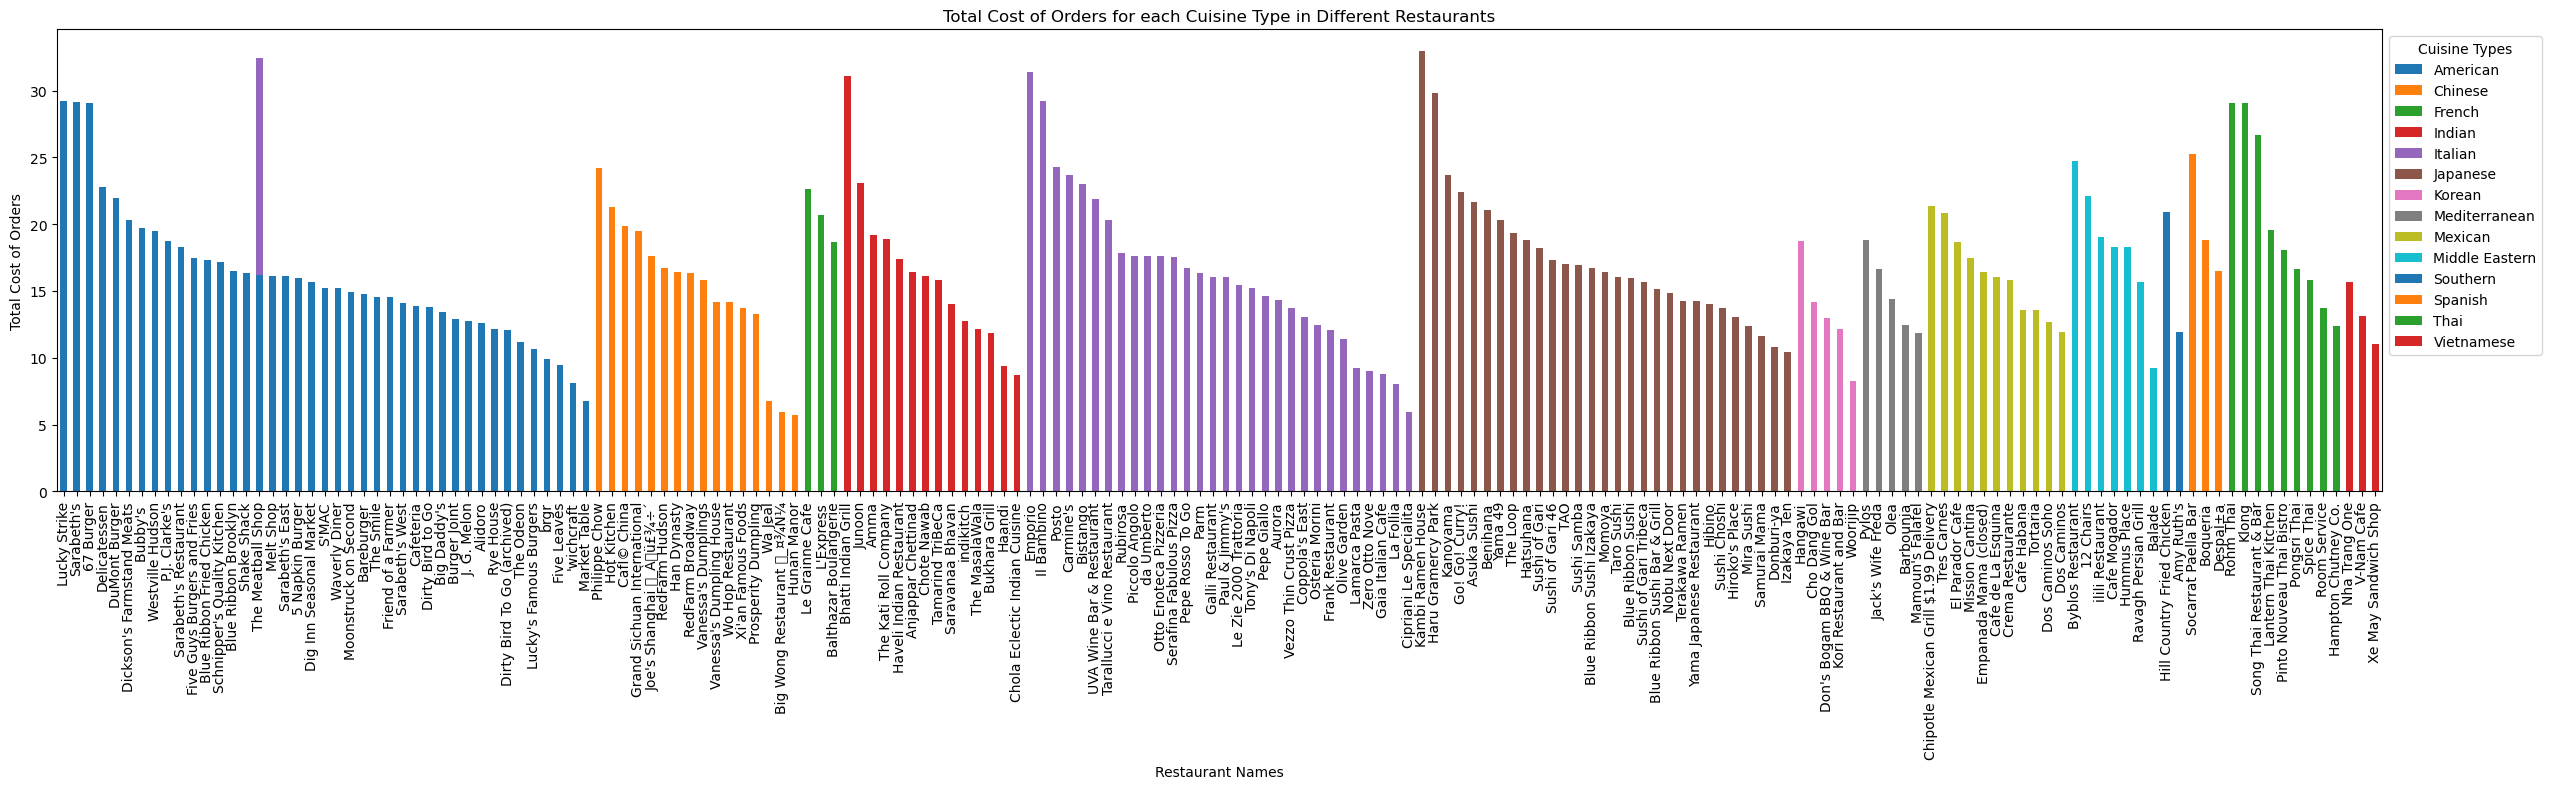

In [98]:
# Group the data by 'Restaurant' and 'CuisineType' and calculate the total cost for each group
grouped_data = df.groupby(['restaurant_name', 'cuisine_type'])['cost_of_the_order'].mean().reset_index()

# Pivot the data to get 'CuisineType' as columns and 'Restaurant' as index
pivot_data = grouped_data.pivot(index='restaurant_name', columns='cuisine_type', values='cost_of_the_order')

pivot_data = pivot_data.sort_values(by=pivot_data.columns.tolist(), ascending=False)

# Create the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(30, 6))

# Add labels, y-axis line and title
plt.xlabel('Restaurant Names')
plt.ylabel('Total Cost of Orders')
plt.title('Total Cost of Orders for each Cuisine Type in Different Restaurants')
plt.axhline(0, color='black', linewidth=0.5)

# Show the legend
plt.legend(title='Cuisine Types', bbox_to_anchor=(1, 1))


In [99]:
#Create plot for restaurants and ratings

Text(50.72222222222221, 0.5, 'Cuisine Type')

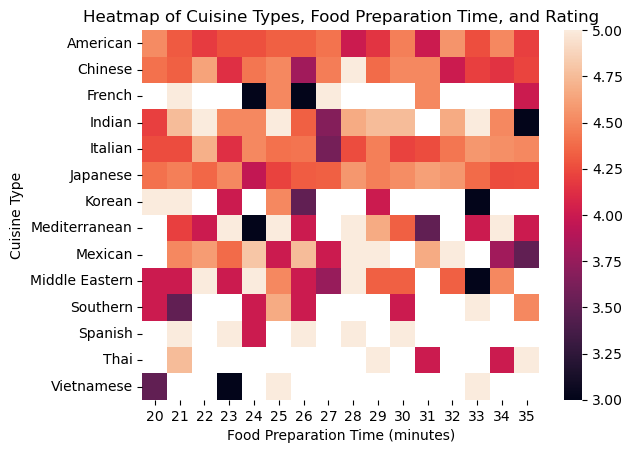

In [100]:
# Create plot for cuisine types, food preperation time and ratings
sns.heatmap(df.pivot_table(index='cuisine_type',columns='food_preparation_time',values='rating'))
plt.title("Heatmap of Cuisine Types, Food Preparation Time, and Rating")
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Cuisine Type")

51.53371970495258


Text(0.5, 58.7222222222222, 'Day of the week')

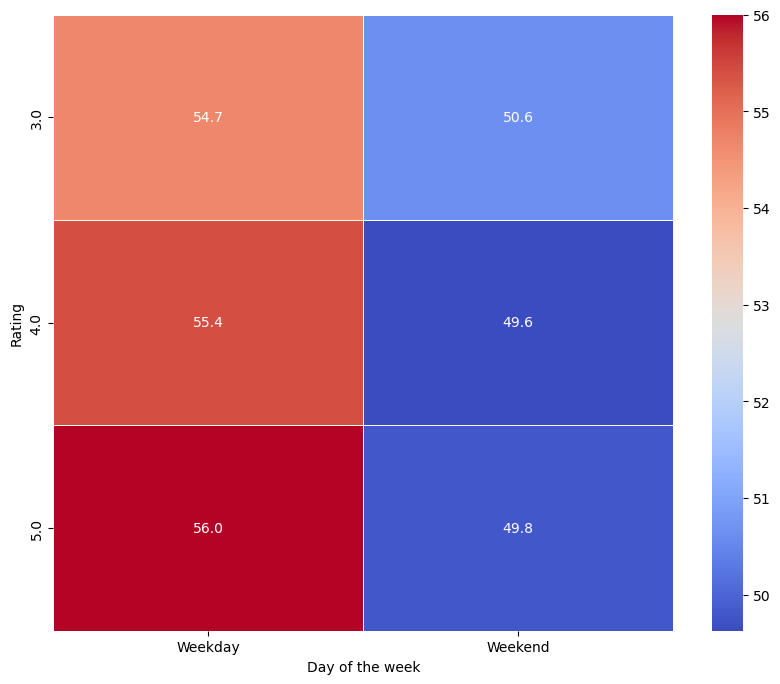

In [107]:
# Create a heatmap for total time for a order and rating in different days of a week.
df['total_time']=df['food_preparation_time']+df['delivery_time']
print(df['total_time'].mean())

# Pivot the data to create a table for the heatmap
heatmap_data = df.pivot_table(index="rating", columns="day_of_the_week", values="total_time", aggfunc="mean")

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.ylabel("Rating")
plt.xlabel("Day of the week")

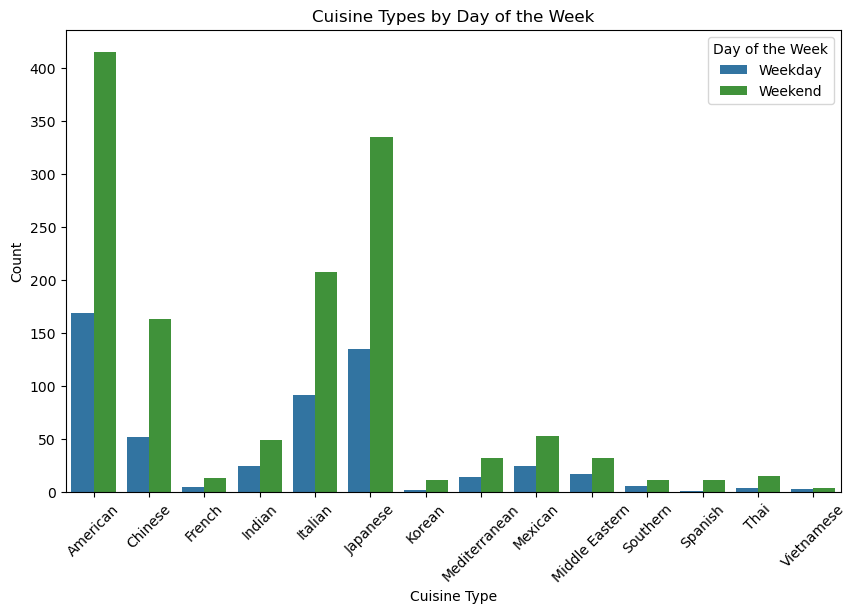

In [106]:
# Group the data by "cuisine_type" and "day_of_the_week" and calculate the counts
grouped_data = df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='Count')

# Create the stacked bar chart using Seaborn with horizontal orientation
plt.figure(figsize=(10, 6))
sns.barplot(x="cuisine_type", y="Count", hue="day_of_the_week", data=grouped_data, palette=["#1f78b4", "#33a02c"])

plt.xlabel("Cuisine Type")
plt.ylabel("Count")
plt.title("Cuisine Types by Day of the Week")
plt.xticks(rotation=45)
plt.legend(title="Day of the Week")

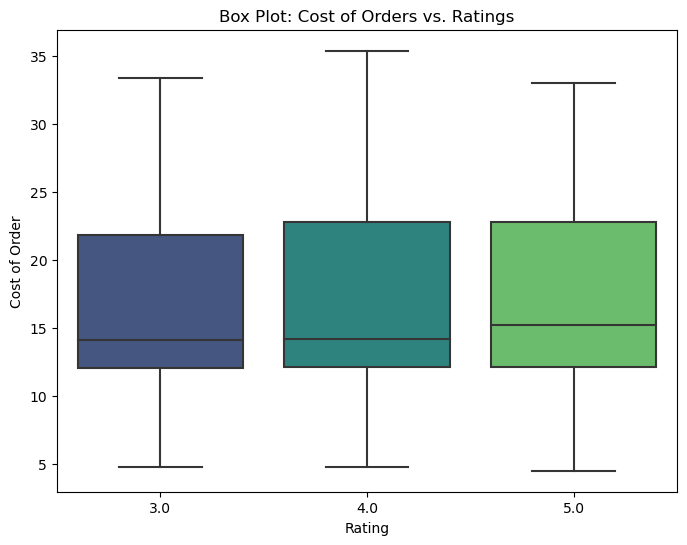

In [ ]:
# Create a joint plot for 'rating' and 'Cost of order' 
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Cost of Order')
plt.title('Box Plot: Cost of Orders vs. Ratings')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Convert 'Rating Count' column to numeric
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

# Count restaurants' mean ratings
count_rating = df['restaurant_name'].value_counts()

# Remove rows with "not given" rating values
df_cleaned = df.dropna(subset=['rating'])

# Calculate the mean rated average 
mean_rate=df_cleaned['rating'].mean()

# Boolean to filter restaurants fullfil the criteria
offer_restaurants=count_rating[(count_rating>50) & (mean_rate>4)]

print(offer_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Filter orders over 20 dollars
order_above_20=df[df['cost_of_the_order']>20]

# Multiple 25% and prices of each order
revenue_above_20=order_above_20['cost_of_the_order'] * 0.25

# Filter orders over 5 dollars and less than 20 dollars
order_above_5=df[(df['cost_of_the_order']<5) & (df['cost_of_the_order'])<20]

# Multiple 15% and prices of each order
revenue_above_5=order_above_5['cost_of_the_order']*0.15

#sum the total net revenue
total_revenue=revenue_above_20.sum()+ revenue_above_5.sum()
print(total_revenue)

8385.950499999999


#### Observations:
The total net revenue for the company is 8385.95


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Caluculate the total time
total_time=df['food_preparation_time']+df['delivery_time']

# Filter the total deliver time above 60
time_above_60=len(total_time[total_time>60])

# Calculate percentage 
time_percentage= time_above_60/len(total_time) *100

print (time_percentage,'%')

10.537407797681771 %


#### Observations:
10.5% orders takes more than 60 minutes to get delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Calulate the mean time of weekday
weekday=df[df['day_of_the_week'].isin(['Weekday'])]
mean_time_weekday=weekday['delivery_time'].mean()

# Calulate the mean time of weekends
weekend=df[df['day_of_the_week'].isin(['Weekend'])]
mean_time_weekend=weekend['delivery_time'].mean()

print(mean_time_weekday)
print(mean_time_weekend)

28.340036563071298
22.4700222057735


#### Observations:
The mean delivery time during weekday is 28 minutes and during weekends the mean delivery time is 6 minutes less than weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* According to the analysis of all the restaurants, cuisine types and restaurants numbers. Shake shack(American food) received the most number of orders. 
* The average cost of order of all the restaurant in New York is 15. 
* The analysis reveals that weekends have more amount of orders. And certain cuisine types tend to have more orders during different weekdays. For example, 'American' and 'Japanese' cuisine have relatively higher ratings compared to other cusisine types.  
* Restaurants receive more high rates than weekends averagely. Though there are other factors affect the ratings such as cuisine types and preperation time.


### Recommendations:

* Provide promotional offer for the cuisine types that are less popular, such as Spanish, thai and vietnamese cuisines. This can help diversify customer choices and increase demand for a wider range of cuisines.
* Given the higher demand on weekends, the company could introduce weekend-specific deals or discounts to attract more orders during those days. This can incentivize customers to use the service more frequently on weekends.
* Streamlining food preparation and delivery processes, especially during weekends, can enhance overall customer satisfaction.
* Provide promotional offer for those customers who give ratings and feedback to encourage customers to provide more detailed feedback along with their ratings.
* Collaborate with restaurants offering popular cuisine types like American and japanese cuisines to optimize delivery processes to positively impact ratings and customer satisfaction. 

---